<a href="https://colab.research.google.com/github/nhd1612/-LJS/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%8D%B0%EC%9D%B4%ED%84%B0_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%B5%9C%EC%A2%85_%EB%B3%B4%EA%B3%A0_(%ED%99%94).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#파이썬 데이터 프로젝트 보고서# 


202104282 이수민 202184042 이재성

In [ ]:
# 한글 폰트 다운로드 ( 런타임 재시작 후 다시 런)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

###주제: 환승역 이용객에 따른 역의 공기질 변화###


###분석목적###
1. 많이 이용하는 환승역 특성상 대중교통을 이용하는\
시민이 가장 많은 역이며, 유동성이 큰 환승역에서 \
먼지가 많이 생성되고 밖에서 유입되어 정체된\
 미세먼지는 특성상 배출이 힘들다.
2. 지하철의 브레이크 패드로 인해 발생한 미세먼지도 \
역 내부에도 머문다고 함\
그렇기에 환승역의 이용 시민의 인원과 환승역마다의 \
공기질을 조사한 데이터로 연구 예정이다.

###기대결과###
1. 사용하는 시민의 인원을 통하여 이용 비율 대비 공기의 상태를 알 수 있다. 
2. 공기 청정기 추가 배치 및 운용 원활 예상
3. 수치화를 통해 특정 지역의 공기질을 알 수 있다. 
4. 일반 역보다 환승역의 미세먼지가 많을 것으로 예상할 수 있다. 

데이터는 열린 공공 서울 데이터에서 오픈된 csv파일 '서울 지하철 역사 공기질' 과 '서울 환승 이용 인원'을 사용했으며, 그 두 데이터의 컬럼중 '역명'을 기준으로 merge함수를 통해 교집합을 추출하였다.

In [ ]:
#PM-10은 미세먼지이다.
#PM-2.5은 초미세먼지이다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

md = pd.read_csv('micro_dust.csv',encoding= 'cp949')                            # 서울 지하철역사 공기질 
md = md.drop(columns=['연번'])                                                  #열 지우기 
tp = pd.read_csv('train_people.csv',encoding= 'cp949')                          # 서울 환승이용인원   
tp = tp.drop(columns=['연번'])                                                  #열 지우기 
merge_data = pd.merge(md,tp,on = '역명', how='inner')                           # column'역명'으로 교집합 merge_data 제작 
PM = merge_data.drop(columns = ['호선','CO2','HCHO','CO','데이터기준일자', '평일(일평균)',
                                '토요일', '일요일','역번호'])                   # 미세먼지만 표시한 종합 데이터
T = merge_data.drop(columns = ['호선','CO2','HCHO','CO','데이터기준일자', 'PM-10',
                               'PM-2.5', '역번호'])                             # 환승이용인원만 표시한 종합 데이터
data = merge_data.drop(columns = ['호선','CO2','HCHO','CO','데이터기준일자','역번호']) # 미세먼지와 환승역 인원 데이터  
merge_data

,호선,역번호,역명,PM-10,PM-2.5,CO2,HCHO,CO,데이터기준일자,평일(일평균),토요일,일요일
0,1호선,150,서울역,39.9,27.3,566,11.5,0.7,2023-04-25,93461,77181,60328
1,4호선,426,서울역,25.1,16.8,491,6.6,0.7,2023-04-25,93461,77181,60328
2,1호선,151,시청,83.5,34.9,545,12.0,0.7,2023-04-25,34177,28478,19627
3,2호선,201,시청,63.2,37.4,522,7.2,0.5,2023-04-25,34177,28478,19627
4,1호선,153,종로3가,96.0,44.6,507,10.3,0.8,2023-04-25,108811,95362,64621
...,...,...,...,...,...,...,...,...,...,...,...,...
91,7호선,2752,온수,30.9,17.4,516,15.6,0.3,2023-04-25,46386,33332,24823
92,8호선,2816,석촌,47.8,22.7,542,16.0,0.4,2023-04-25,29676,19988,15215
93,9호선,933,석촌,51.7,33.0,467,5.4,0.6,2023-04-25,29676,19988,15215
94,8호선,2821,복정,24.4,11.7,541,16.3,0.5,2023-04-25,57748,37995,27934


In [ ]:
print(md) # 서울 지하철역사 공기질  데이터이다

      호선  역번호      역명  PM-10  PM-2.5  CO2  HCHO   CO     데이터기준일자
0    1호선  150     서울역   39.9    27.3  566  11.5  0.7  2023-04-25
1    1호선  151      시청   83.5    34.9  545  12.0  0.7  2023-04-25
2    1호선  152      종각  110.0    58.0  500  12.2  0.7  2023-04-25
3    1호선  153    종로3가   96.0    44.6  507  10.3  0.8  2023-04-25
4    1호선  154    종로5가   73.2    37.6  525   8.1  0.7  2023-04-25
..   ...  ...     ...    ...     ...  ...   ...  ...         ...
258  9호선  934    송파나루   44.3    25.9  449   4.4  0.8  2023-04-25
259  9호선  935    한성백제   40.1    35.5  428   7.4  1.2  2023-04-25
260  9호선  936   올림픽공원   49.1    27.8  465   6.1  0.5  2023-04-25
261  9호선  937    둔촌오륜   36.7    25.8  419   5.7  0.5  2023-04-25
262  9호선  938  중앙보훈병원   39.2    23.2  510   5.8  0.7  2023-04-25

[263 rows x 9 columns]


In [ ]:
print(tp) # 서울 환승이용인원 데이터이다

         역명  평일(일평균)    토요일    일요일
0      가락시장    27085  18096  13918
1   가산디지털단지    71425  42899  33737
2        강남    63594  42063  30810
3      강남구청    50526  33079  21566
4        강동     4605   3219   2313
..      ...      ...    ...    ...
65      충정로    11961   6183   4337
66     태릉입구    37160  27116  19871
67       합정    76959  59612  42655
68     홍대입구    51802  49401  37311
69    효창공원앞     5125   4132   3243

[70 rows x 4 columns]


In [ ]:
print(merge_data) # column'역명'으로 교집합 merge_data 한 데이터이다

     호선   역번호    역명  PM-10  PM-2.5  CO2  HCHO   CO     데이터기준일자  평일(일평균)  \
0   1호선   150   서울역   39.9    27.3  566  11.5  0.7  2023-04-25    93461   
1   4호선   426   서울역   25.1    16.8  491   6.6  0.7  2023-04-25    93461   
2   1호선   151    시청   83.5    34.9  545  12.0  0.7  2023-04-25    34177   
3   2호선   201    시청   63.2    37.4  522   7.2  0.5  2023-04-25    34177   
4   1호선   153  종로3가   96.0    44.6  507  10.3  0.8  2023-04-25   108811   
..  ...   ...   ...    ...     ...  ...   ...  ...         ...      ...   
91  7호선  2752    온수   30.9    17.4  516  15.6  0.3  2023-04-25    46386   
92  8호선  2816    석촌   47.8    22.7  542  16.0  0.4  2023-04-25    29676   
93  9호선   933    석촌   51.7    33.0  467   5.4  0.6  2023-04-25    29676   
94  8호선  2821    복정   24.4    11.7  541  16.3  0.5  2023-04-25    57748   
95  8호선  2827    모란   24.2    12.0  398  11.1  0.5  2023-04-25    15667   

      토요일    일요일  
0   77181  60328  
1   77181  60328  
2   28478  19627  
3   28478  19627  
4   

In [ ]:
print(PM) # 미세먼지만 표시한 종합 데이터데이터이다

      역명  PM-10  PM-2.5
0    서울역   39.9    27.3
1    서울역   25.1    16.8
2     시청   83.5    34.9
3     시청   63.2    37.4
4   종로3가   96.0    44.6
..   ...    ...     ...
91    온수   30.9    17.4
92    석촌   47.8    22.7
93    석촌   51.7    33.0
94    복정   24.4    11.7
95    모란   24.2    12.0

[96 rows x 3 columns]


In [ ]:
print(data) # 미세먼지와 환승역 인원 데이터 이다

      역명  PM-10  PM-2.5  평일(일평균)    토요일    일요일
0    서울역   39.9    27.3    93461  77181  60328
1    서울역   25.1    16.8    93461  77181  60328
2     시청   83.5    34.9    34177  28478  19627
3     시청   63.2    37.4    34177  28478  19627
4   종로3가   96.0    44.6   108811  95362  64621
..   ...    ...     ...      ...    ...    ...
91    온수   30.9    17.4    46386  33332  24823
92    석촌   47.8    22.7    29676  19988  15215
93    석촌   51.7    33.0    29676  19988  15215
94    복정   24.4    11.7    57748  37995  27934
95    모란   24.2    12.0    15667  11789   8528

[96 rows x 6 columns]


In [ ]:
print(T) # 환승이용인원만 표시한 종합 데이터이다

      역명  평일(일평균)    토요일    일요일
0    서울역    93461  77181  60328
1    서울역    93461  77181  60328
2     시청    34177  28478  19627
3     시청    34177  28478  19627
4   종로3가   108811  95362  64621
..   ...      ...    ...    ...
91    온수    46386  33332  24823
92    석촌    29676  19988  15215
93    석촌    29676  19988  15215
94    복정    57748  37995  27934
95    모란    15667  11789   8528

[96 rows x 4 columns]


### PM-10(미세먼지)
3호선 환승 을지로 3가\
1호선 환승 동대문\
1호선 환승 종로3가 \
순으로 미세먼지가 많이 발생하는 것으로 나타낸다. \
적은순서는 \
3호선 가락시장 \
4호선 삼각지\
8호선 모란\
순으로 진행된다.

In [ ]:
merge_data.sort_values('PM-10',ascending=False) #PM-10 환승인원 내림차수로 정렬한 것이다

,호선,역번호,역명,PM-10,PM-2.5,CO2,HCHO,CO,데이터기준일자,평일(일평균),토요일,일요일
15,3호선,320,을지로3가,96.9,33.9,478,7.6,0.6,2023-04-25,47919,37252,25553
7,1호선,155,동대문,96.6,54.0,585,7.9,1.0,2023-04-25,34701,30571,21400
4,1호선,153,종로3가,96.0,44.6,507,10.3,0.8,2023-04-25,108811,95362,64621
2,1호선,151,시청,83.5,34.9,545,12.0,0.7,2023-04-25,34177,28478,19627
63,4호선,430,이촌,74.2,32.8,473,8.3,1.0,2023-04-25,19372,19111,14386
...,...,...,...,...,...,...,...,...,...,...,...,...
12,2호선,246,신설동,24.4,17.6,455,6.6,0.8,2023-04-25,28393,22387,18145
94,8호선,2821,복정,24.4,11.7,541,16.3,0.5,2023-04-25,57748,37995,27934
95,8호선,2827,모란,24.2,12.0,398,11.1,0.5,2023-04-25,15667,11789,8528
61,4호선,428,삼각지,23.3,15.1,470,5.0,0.8,2023-04-25,33858,30371,21555


###PM-2.5(초미세먼지)###

3호선 환승 을지로 3가\
1호선 환승 동대문\
1호선 환승 종로3가\
순으로 초미세먼지가 많이 발생하는 것으로 나타낸다.\
적은순서는\
3호선 가락시장\
4호선 삼각지\
8호선 모란\
순으로 진행된다.

In [ ]:
merge_data.sort_values('PM-2.5',ascending=False) #PM-2.5 환승인원 내림차수로 정렬한 것 이다 

,호선,역번호,역명,PM-10,PM-2.5,CO2,HCHO,CO,데이터기준일자,평일(일평균),토요일,일요일
7,1호선,155,동대문,96.6,54.0,585,7.9,1.0,2023-04-25,34701,30571,21400
4,1호선,153,종로3가,96.0,44.6,507,10.3,0.8,2023-04-25,108811,95362,64621
41,2호선,243,충정로,60.6,39.1,439,8.8,0.7,2023-04-25,11961,6183,4337
47,3호선,321,충무로,62.9,38.5,479,6.8,0.6,2023-04-25,101438,77858,51216
3,2호선,201,시청,63.2,37.4,522,7.2,0.5,2023-04-25,34177,28478,19627
...,...,...,...,...,...,...,...,...,...,...,...,...
37,5호선,2524,영등포구청,26.4,13.0,533,4.1,0.5,2023-04-25,64114,44386,29907
57,8호선,2818,가락시장,27.1,12.5,712,12.3,0.5,2023-04-25,27085,18096,13918
68,5호선,2530,공덕,25.0,12.3,444,6.2,0.4,2023-04-25,66132,44274,32655
95,8호선,2827,모란,24.2,12.0,398,11.1,0.5,2023-04-25,15667,11789,8528


###평일(일평균)/토요일/일요일###


2호선 환승 신도림\
7호선 환승 고속터미널\
3호선 환승 고속터미널\
순으로 많이 왕래한다는 것으로 알 수 있다.\
적은순서는\
2호선 충정로\
6호선 효창공원앞\
5호선 강동\
순으로 진행된다.

In [ ]:
merge_data.sort_values('평일(일평균)',ascending=False) #평일(일평균) 환승인원 내림차수 

,호선,역번호,역명,PM-10,PM-2.5,CO2,HCHO,CO,데이터기준일자,평일(일평균),토요일,일요일
35,2호선,234,신도림,50.5,17.9,481,7.5,0.6,2023-04-25,215894,174249,126395
52,7호선,2736,고속터미널,42.5,25.6,692,18.8,0.5,2023-04-25,169165,139754,99681
51,3호선,329,고속터미널,31.3,19.4,533,7.8,0.6,2023-04-25,169165,139754,99681
18,2호선,205,동대문역사문화공원,39.0,26.4,527,9.5,0.7,2023-04-25,160426,123540,89843
20,5호선,2537,동대문역사문화공원,32.7,17.0,350,8.5,0.5,2023-04-25,160426,123540,89843
...,...,...,...,...,...,...,...,...,...,...,...,...
55,3호선,339,수서,46.2,24.2,506,5.5,0.5,2023-04-25,12162,8306,6257
42,5호선,2532,충정로,29.5,15.6,438,5.4,0.4,2023-04-25,11961,6183,4337
41,2호선,243,충정로,60.6,39.1,439,8.8,0.7,2023-04-25,11961,6183,4337
80,6호선,2628,효창공원앞,37.2,18.4,515,11.4,0.4,2023-04-25,5125,4132,3243


In [ ]:
merge_data.sort_values('토요일',ascending=False) #토요일 환승인원 내림차수

,호선,역번호,역명,PM-10,PM-2.5,CO2,HCHO,CO,데이터기준일자,평일(일평균),토요일,일요일
35,2호선,234,신도림,50.5,17.9,481,7.5,0.6,2023-04-25,215894,174249,126395
52,7호선,2736,고속터미널,42.5,25.6,692,18.8,0.5,2023-04-25,169165,139754,99681
51,3호선,329,고속터미널,31.3,19.4,533,7.8,0.6,2023-04-25,169165,139754,99681
18,2호선,205,동대문역사문화공원,39.0,26.4,527,9.5,0.7,2023-04-25,160426,123540,89843
20,5호선,2537,동대문역사문화공원,32.7,17.0,350,8.5,0.5,2023-04-25,160426,123540,89843
...,...,...,...,...,...,...,...,...,...,...,...,...
17,5호선,2536,을지로4가,32.9,15.3,381,5.0,0.6,2023-04-25,12604,8154,5202
42,5호선,2532,충정로,29.5,15.6,438,5.4,0.4,2023-04-25,11961,6183,4337
41,2호선,243,충정로,60.6,39.1,439,8.8,0.7,2023-04-25,11961,6183,4337
80,6호선,2628,효창공원앞,37.2,18.4,515,11.4,0.4,2023-04-25,5125,4132,3243


In [ ]:
merge_data.sort_values('일요일',ascending=False) #일요일 환승인원 내림차수

,호선,역번호,역명,PM-10,PM-2.5,CO2,HCHO,CO,데이터기준일자,평일(일평균),토요일,일요일
35,2호선,234,신도림,50.5,17.9,481,7.5,0.6,2023-04-25,215894,174249,126395
52,7호선,2736,고속터미널,42.5,25.6,692,18.8,0.5,2023-04-25,169165,139754,99681
51,3호선,329,고속터미널,31.3,19.4,533,7.8,0.6,2023-04-25,169165,139754,99681
18,2호선,205,동대문역사문화공원,39.0,26.4,527,9.5,0.7,2023-04-25,160426,123540,89843
20,5호선,2537,동대문역사문화공원,32.7,17.0,350,8.5,0.5,2023-04-25,160426,123540,89843
...,...,...,...,...,...,...,...,...,...,...,...,...
17,5호선,2536,을지로4가,32.9,15.3,381,5.0,0.6,2023-04-25,12604,8154,5202
42,5호선,2532,충정로,29.5,15.6,438,5.4,0.4,2023-04-25,11961,6183,4337
41,2호선,243,충정로,60.6,39.1,439,8.8,0.7,2023-04-25,11961,6183,4337
80,6호선,2628,효창공원앞,37.2,18.4,515,11.4,0.4,2023-04-25,5125,4132,3243


In [ ]:
merge_data['PM-10'].min() # PM-10(미세먼지) 최솟값이다

21.7

In [ ]:
merge_data['PM-10'].max() # PM-10(미세먼지) 최댓값이다

96.9

In [ ]:
merge_data['PM-2.5'].max()# PM-2.5(초미세먼지) 최댓값이다

54.0

In [ ]:
merge_data['PM-2.5'].min() # PM-2.5(초미세먼지) 최솟값이다

11.7

#시각화 그래프 #
1. 공기질 그래프
2. 환승역 이용 인원 그래프

###1. 공기질 그래프###

Text(0.5, 1.0, 'ultrafine dust of transfer station')

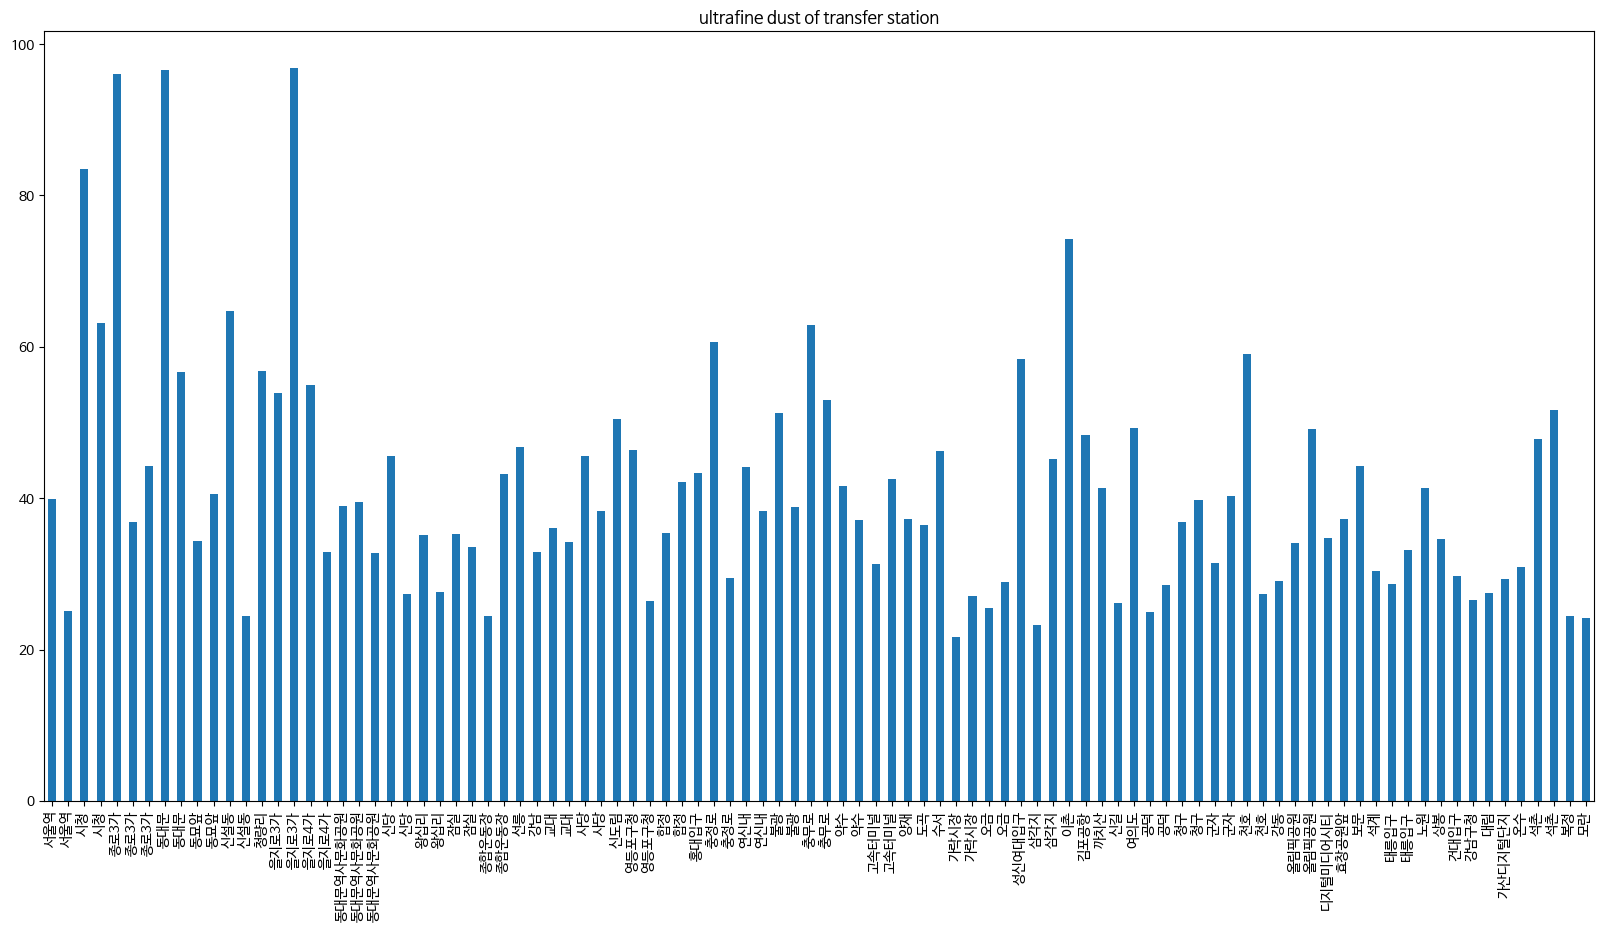

In [ ]:
data = merge_data['PM-10'].plot(kind = 'bar')         #bar 형식의 미세먼지 시각화 
plt.rc('font', family='NanumBarunGothic') # 한글 폰트 
plt.xticks(np.arange(0,96,1),('서울역','서울역','시청','시청','종로3가','종로3가','종로3가','동대문',
                              '동대문','동묘앞','동묘앞','신설동','신설동','청량리','을지로3가','을지로3가',
                              '을지로4가','을지로4가','동대문역사문화공원','동대문역사문화공원','동대문역사문화공원',
                              '신당','신당','왕십리','왕십리','잠실','잠실','종합운동장','종합운동장','선릉','강남','교대',
                              '교대','사당','사당','신도림','영등포구청','영등포구청','합정','합정','홍대입구','충정로',
                              '충정로','연신내','연신내','불광','불광','충무로','충무로','약수','약수','고속터미널',
                              '고속터미널','양재','도곡','수서','가락시장','가락시장','오금','오금','성신여대입구','삼각지',
                              '삼각지','이촌','김포공항','까치산','신길','여의도','공덕','공덕','청구','청구','군자',
                              '군자','천호','천호','강동','올림픽공원','올림픽공원','디지털미디어시티','효창공원앞','보문',
                              '석계','태릉입구','태릉입구','노원','상봉','건대입구','강남구청','대림','가산디지털단지','온수',
                              '석촌','석촌','복정','모란')) # x 눈금
plt.rcParams['figure.figsize'] = [20,10 ] #그래프 사이즈
plt.title('ultrafine dust of transfer station') #그래프 제목

***위의 데이터는 미세먼지에 증가도에 따른 시각화한 데이터 이며 가장 높은 을지로 3가역 96.9 동대문역 96.6 종로3가역 96이다. 가장 낮은 곳은 복정역 24.4 모란역 24.2다.*** 

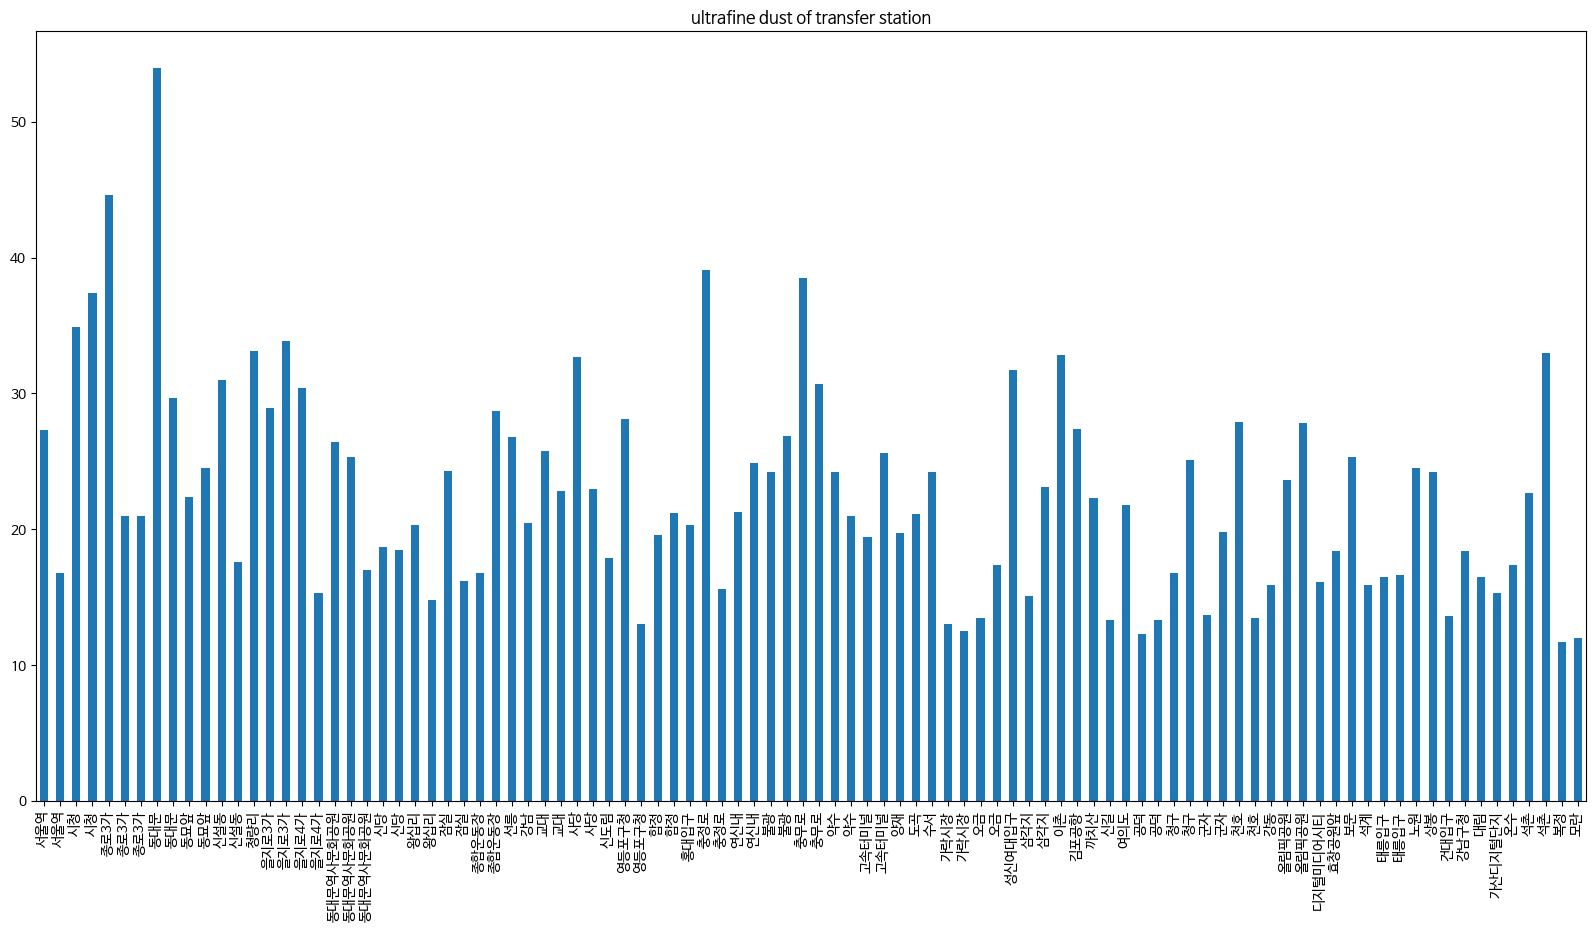

In [ ]:
merge_data['PM-2.5'].plot(kind = 'bar') # bar형식의 초미세먼지 시각화
plt.rc('font', family='NanumBarunGothic') # 한글 폰트 
plt.xticks(np.arange(0,96,1),('서울역','서울역','시청','시청','종로3가','종로3가','종로3가','동대문',
                              '동대문','동묘앞','동묘앞','신설동','신설동','청량리','을지로3가','을지로3가',
                              '을지로4가','을지로4가','동대문역사문화공원','동대문역사문화공원','동대문역사문화공원',
                              '신당','신당','왕십리','왕십리','잠실','잠실','종합운동장','종합운동장','선릉','강남','교대',
                              '교대','사당','사당','신도림','영등포구청','영등포구청','합정','합정','홍대입구','충정로',
                              '충정로','연신내','연신내','불광','불광','충무로','충무로','약수','약수','고속터미널',
                              '고속터미널','양재','도곡','수서','가락시장','가락시장','오금','오금','성신여대입구','삼각지',
                              '삼각지','이촌','김포공항','까치산','신길','여의도','공덕','공덕','청구','청구','군자',
                              '군자','천호','천호','강동','올림픽공원','올림픽공원','디지털미디어시티','효창공원앞','보문',
                              '석계','태릉입구','태릉입구','노원','상봉','건대입구','강남구청','대림','가산디지털단지','온수', 
                              '석촌','석촌','복정','모란')) # x 눈금
plt.rcParams['figure.figsize'] = [20,10 ] #그래프 사이즈
plt.title('ultrafine dust of transfer station') #그래프 제목
plt.show()

***위의 데이터는 초미세먼지에 증가도에 따른 시각화한 데이터 이며 가장 높은 동대문역 54.0 종로3가역 44.6 충정로 39.1로 진행된다.이다. 가장 낮은 곳은 공덕역 12.3 모란역 12.0 복정역 11.7 이다.*** 

###2.서울 환승역 이용 인원###

Text(0.5, 1.0, 'ultrafine dust of transfer station')

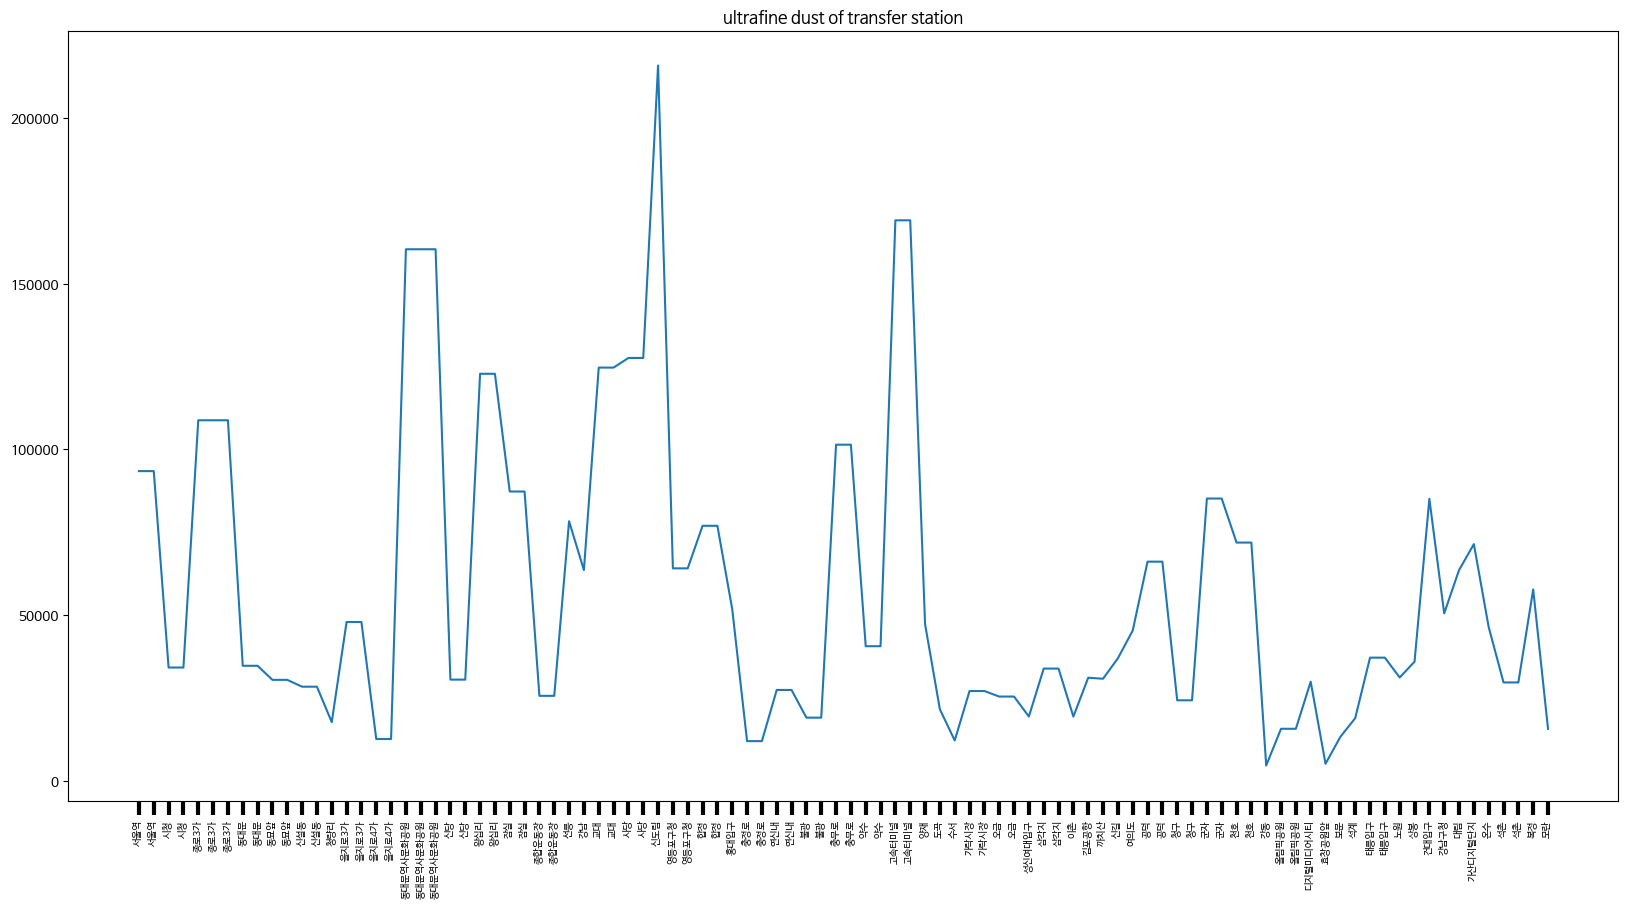

In [ ]:
#환승역 인원 그래프 그리기
# 평일( 일평균)
data = merge_data['평일(일평균)'].plot(kind = 'line')         
plt.rc('font', family='NanumBarunGothic') # 한글 폰트 
plt.xticks(np.arange(0,96,1),('서울역','서울역','시청','시청','종로3가','종로3가','종로3가','동대문',
                              '동대문','동묘앞','동묘앞','신설동','신설동','청량리','을지로3가','을지로3가',
                              '을지로4가','을지로4가','동대문역사문화공원','동대문역사문화공원','동대문역사문화공원',
                              '신당','신당','왕십리','왕십리','잠실','잠실','종합운동장','종합운동장','선릉','강남','교대',
                              '교대','사당','사당','신도림','영등포구청','영등포구청','합정','합정','홍대입구','충정로',
                              '충정로','연신내','연신내','불광','불광','충무로','충무로','약수','약수','고속터미널',
                              '고속터미널','양재','도곡','수서','가락시장','가락시장','오금','오금','성신여대입구','삼각지',
                              '삼각지','이촌','김포공항','까치산','신길','여의도','공덕','공덕','청구','청구','군자',
                              '군자','천호','천호','강동','올림픽공원','올림픽공원','디지털미디어시티','효창공원앞','보문',
                              '석계','태릉입구','태릉입구','노원','상봉','건대입구','강남구청','대림','가산디지털단지','온수',
                              '석촌','석촌','복정','모란')) # x 눈금 
data.tick_params(axis ='x', labelsize = 7,
               length =10, width = 3,rotation=90) # x 눈금 텍스트 회전 
plt.rcParams['figure.figsize'] = [20,10 ] #그래프 사이즈
plt.title('Transfer station passengers(weekday)') #그래프 제목

위에 시각화 그래프는 환승역 이용 인원 중 평일 이용객들에 대한 시각화 그래프이다. 평균적으로 선릉역은 78335명 복정역57784명 강남구청50526역으로 환승역중 가장 많이 이용하는 역들이다..

Text(0.5, 1.0, 'Transfer station passengers(Saturday)')

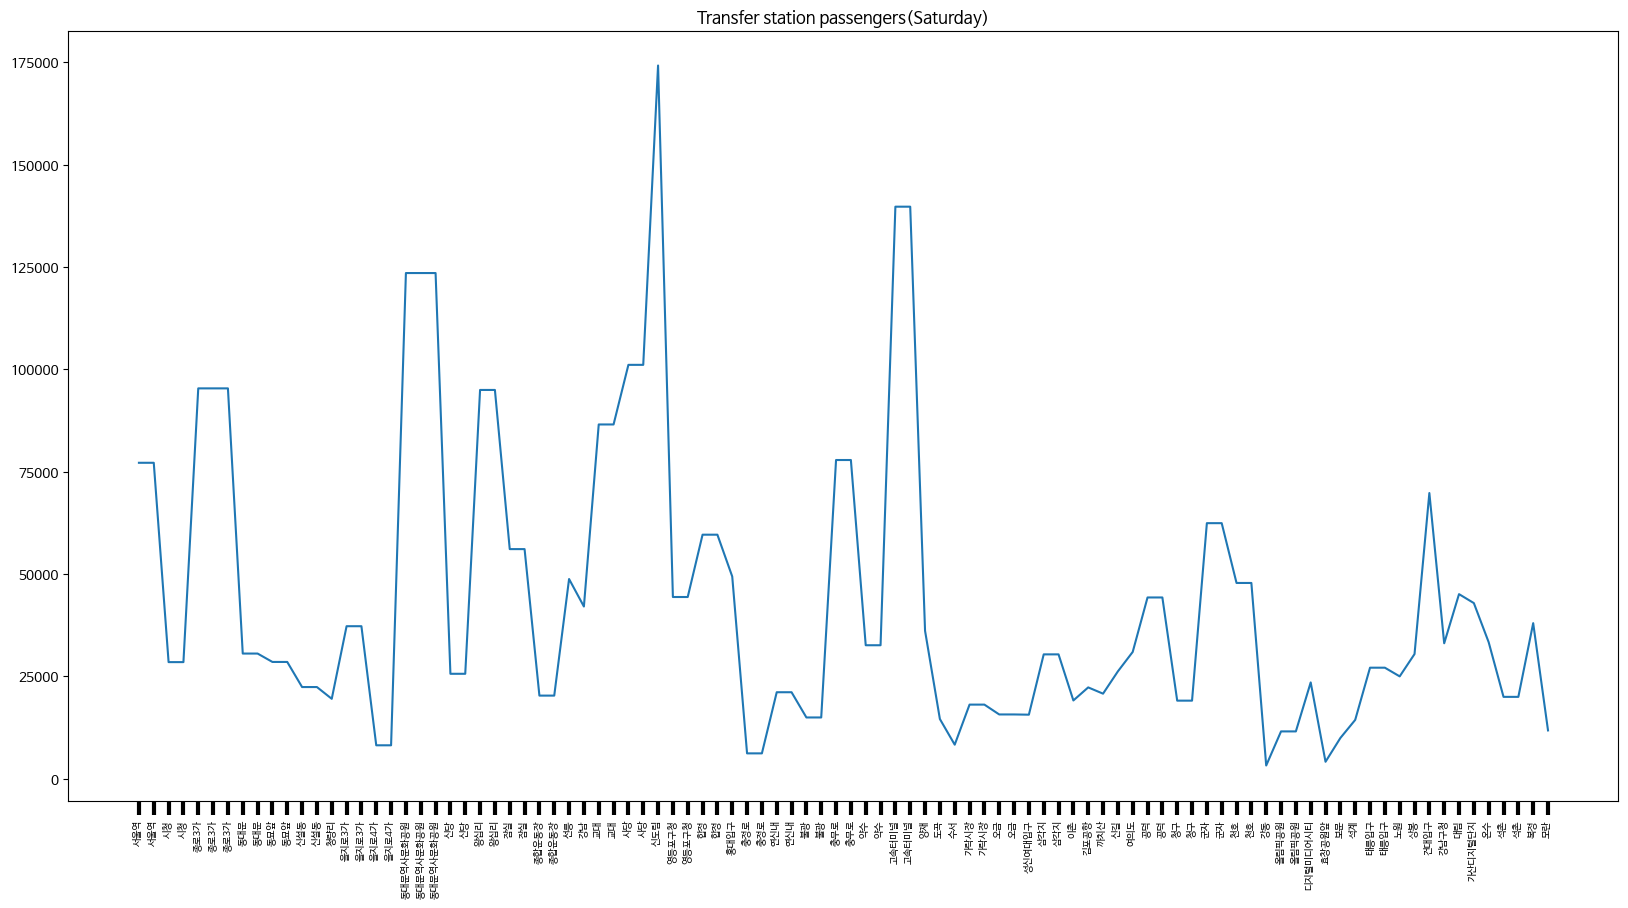

In [ ]:
#환승역 인원 그래프 그리기
# 주말(토요일)
data = merge_data['토요일'].plot(kind = 'line')         
plt.rc('font', family='NanumBarunGothic') # 한글 폰트 
plt.xticks(np.arange(0,96,1),('서울역','서울역','시청','시청','종로3가','종로3가','종로3가','동대문',
                              '동대문','동묘앞','동묘앞','신설동','신설동','청량리','을지로3가','을지로3가',
                              '을지로4가','을지로4가','동대문역사문화공원','동대문역사문화공원','동대문역사문화공원',
                              '신당','신당','왕십리','왕십리','잠실','잠실','종합운동장','종합운동장','선릉','강남','교대',
                              '교대','사당','사당','신도림','영등포구청','영등포구청','합정','합정','홍대입구','충정로',
                              '충정로','연신내','연신내','불광','불광','충무로','충무로','약수','약수','고속터미널',
                              '고속터미널','양재','도곡','수서','가락시장','가락시장','오금','오금','성신여대입구','삼각지',
                              '삼각지','이촌','김포공항','까치산','신길','여의도','공덕','공덕','청구','청구','군자',
                              '군자','천호','천호','강동','올림픽공원','올림픽공원','디지털미디어시티','효창공원앞','보문',
                              '석계','태릉입구','태릉입구','노원','상봉','건대입구','강남구청','대림','가산디지털단지','온수',
                              '석촌','석촌','복정','모란')) # x 눈금 
data.tick_params(axis ='x', labelsize = 7,
               length =10, width = 3,rotation=90) # x 눈금 텍스트 회전 
plt.rcParams['figure.figsize'] = [20,10 ] #그래프 사이즈
plt.title('Transfer station passengers(Saturday)') #그래프 제목

위에 시각화 그래프는 환승역 이용 인원 중 토요일 이용객들에 대한 시각화 그래프이다. 평균적으로 선릉역은 78335명 복정역37995명 양재역36128명으로 환승역중 가장 많이 이용하는 역들이다.

Text(0.5, 1.0, 'Transfer station passengers(sunday)')

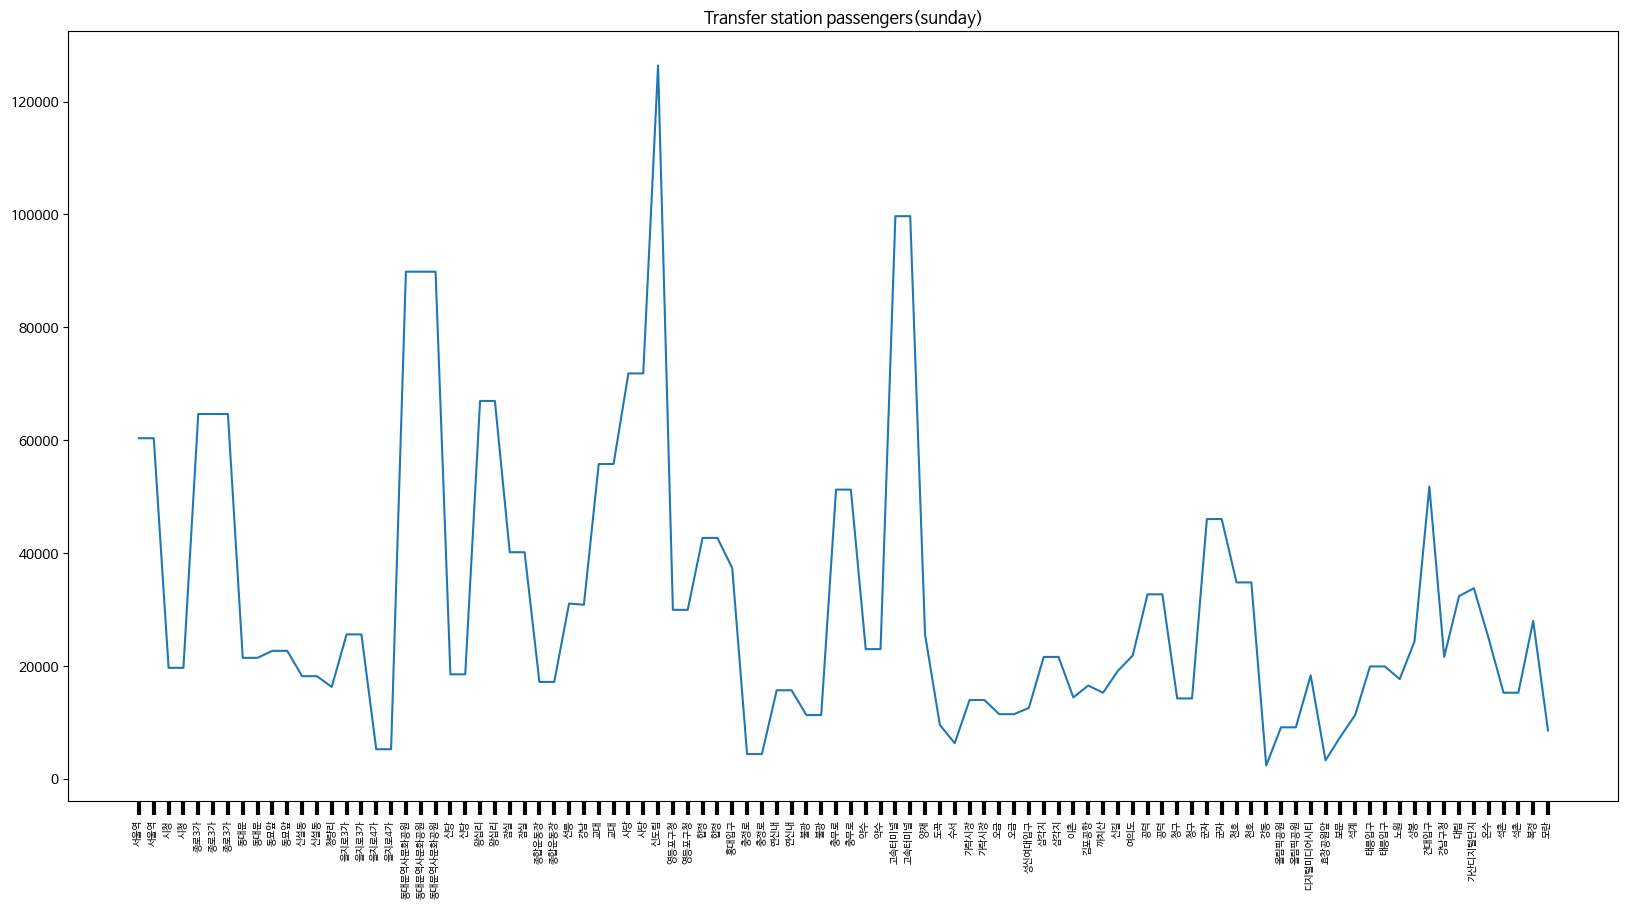

In [ ]:
#환승역 인원 그래프 그리기
# 주말(일요일)
data = merge_data['일요일'].plot(kind = 'line')         
plt.rc('font', family='NanumBarunGothic') # 한글 폰트 
plt.xticks(np.arange(0,96,1),('서울역','서울역','시청','시청','종로3가','종로3가','종로3가','동대문',
                              '동대문','동묘앞','동묘앞','신설동','신설동','청량리','을지로3가','을지로3가',
                              '을지로4가','을지로4가','동대문역사문화공원','동대문역사문화공원','동대문역사문화공원',
                              '신당','신당','왕십리','왕십리','잠실','잠실','종합운동장','종합운동장','선릉','강남','교대',
                              '교대','사당','사당','신도림','영등포구청','영등포구청','합정','합정','홍대입구','충정로',
                              '충정로','연신내','연신내','불광','불광','충무로','충무로','약수','약수','고속터미널',
                              '고속터미널','양재','도곡','수서','가락시장','가락시장','오금','오금','성신여대입구','삼각지',
                              '삼각지','이촌','김포공항','까치산','신길','여의도','공덕','공덕','청구','청구','군자',
                              '군자','천호','천호','강동','올림픽공원','올림픽공원','디지털미디어시티','효창공원앞','보문',
                              '석계','태릉입구','태릉입구','노원','상봉','건대입구','강남구청','대림','가산디지털단지','온수',
                              '석촌','석촌','복정','모란')) # x 눈금 
data.tick_params(axis ='x', labelsize = 7,
               length =10, width = 3,rotation=90) # x 눈금 텍스트 회전 
plt.rcParams['figure.figsize'] = [20,10 ] #그래프 사이즈
plt.title('Transfer station passengers(sunday)') #그래프 제목

위에 시각화 그래프는 환승역 이용 인원 중 일요일 이용객들에 대한 시각화 그래프이다. 평균적으로 선릉역은 31021명 복정역27934명 양재역25526명으로 환승역중 가장 많이 이용하는 역들이다.

#모든 요일의 데이터 시각화 #

Text(0.5, 1.0, 'ultrafine dust of transfer station')

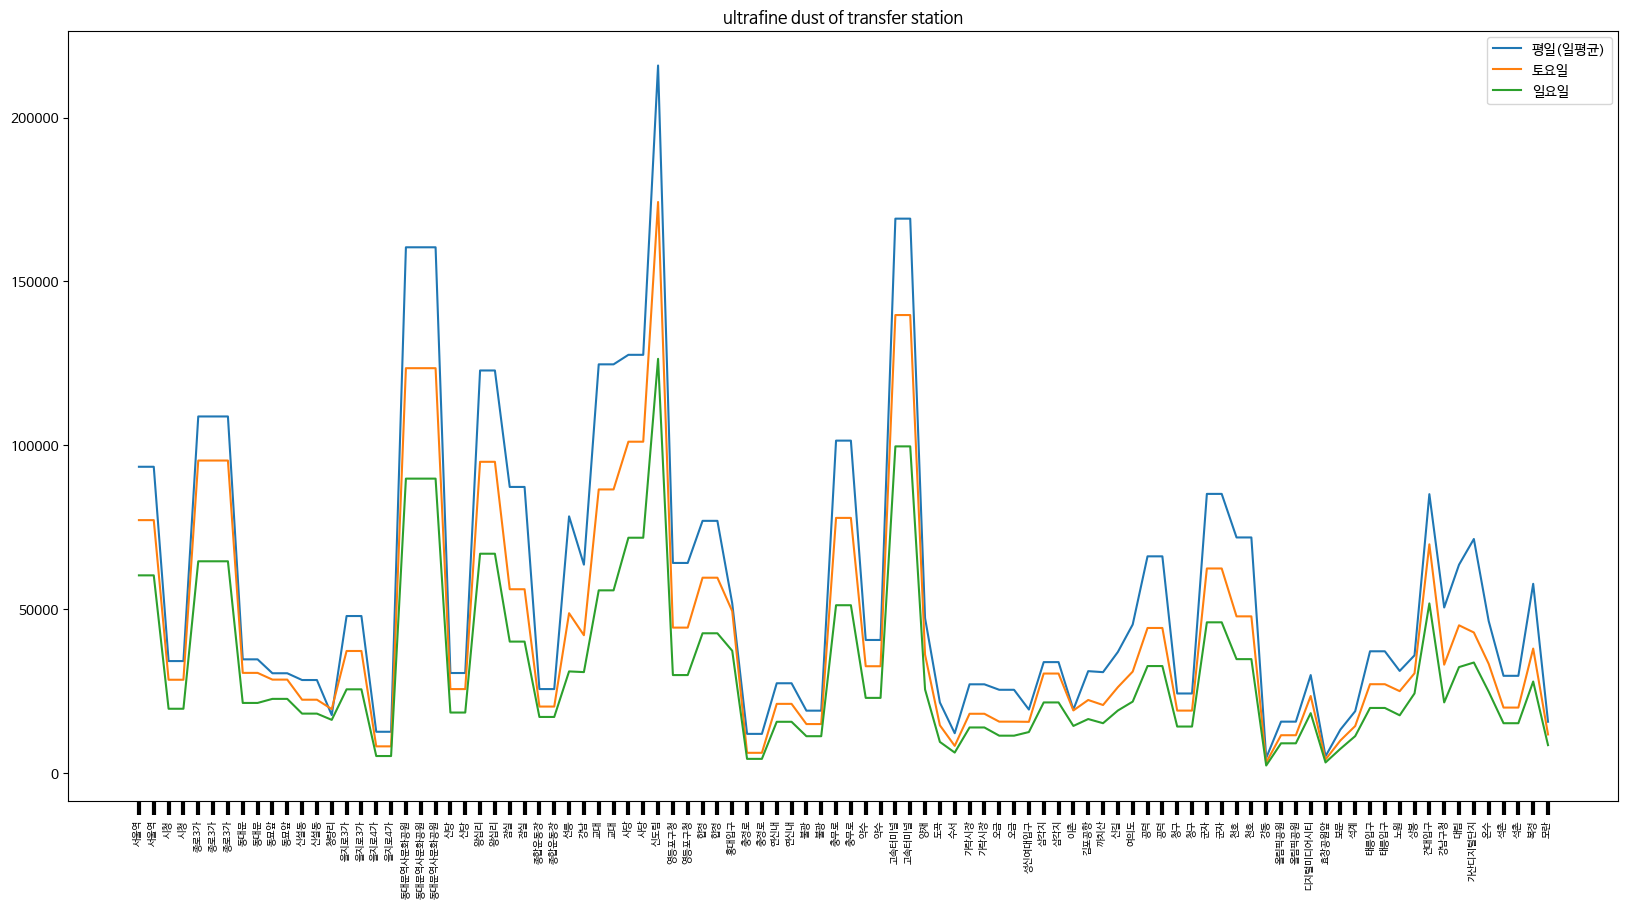

In [ ]:
#환승역 인원 그래프 그리기
# 전체 요일 
data = T.plot(kind = 'line')         
plt.rc('font', family='NanumBarunGothic') # 한글 폰트 
plt.xticks(np.arange(0,96,1),('서울역','서울역','시청','시청','종로3가','종로3가','종로3가','동대문',
                              '동대문','동묘앞','동묘앞','신설동','신설동','청량리','을지로3가','을지로3가',
                              '을지로4가','을지로4가','동대문역사문화공원','동대문역사문화공원','동대문역사문화공원',
                              '신당','신당','왕십리','왕십리','잠실','잠실','종합운동장','종합운동장','선릉','강남','교대',
                              '교대','사당','사당','신도림','영등포구청','영등포구청','합정','합정','홍대입구','충정로',
                              '충정로','연신내','연신내','불광','불광','충무로','충무로','약수','약수','고속터미널',
                              '고속터미널','양재','도곡','수서','가락시장','가락시장','오금','오금','성신여대입구','삼각지',
                              '삼각지','이촌','김포공항','까치산','신길','여의도','공덕','공덕','청구','청구','군자',
                              '군자','천호','천호','강동','올림픽공원','올림픽공원','디지털미디어시티','효창공원앞','보문',
                              '석계','태릉입구','태릉입구','노원','상봉','건대입구','강남구청','대림','가산디지털단지','온수',
                              '석촌','석촌','복정','모란')) # x 눈금 
data.tick_params(axis ='x', labelsize = 7,
               length =10, width = 3,rotation=90) # x 눈금 텍스트 회전 
plt.rcParams['figure.figsize'] = [20,10 ] #그래프 사이즈
plt.title('ultrafine dust of transfer station') #그래프 제목

위의 데이터는 평일과 공유일의 환승역 인원이며, 평일이 가장 많이 이용한다는 것을 보여준다. 또한 강남구청 역 같은 경우 평일 사용 인원수가 3위권이였지만,주말같은 경우 양재역이 강남구청이 더 적은 수치를 나타냈다. 

#미세먼지 & 초미세먼지 시각화 데이터 

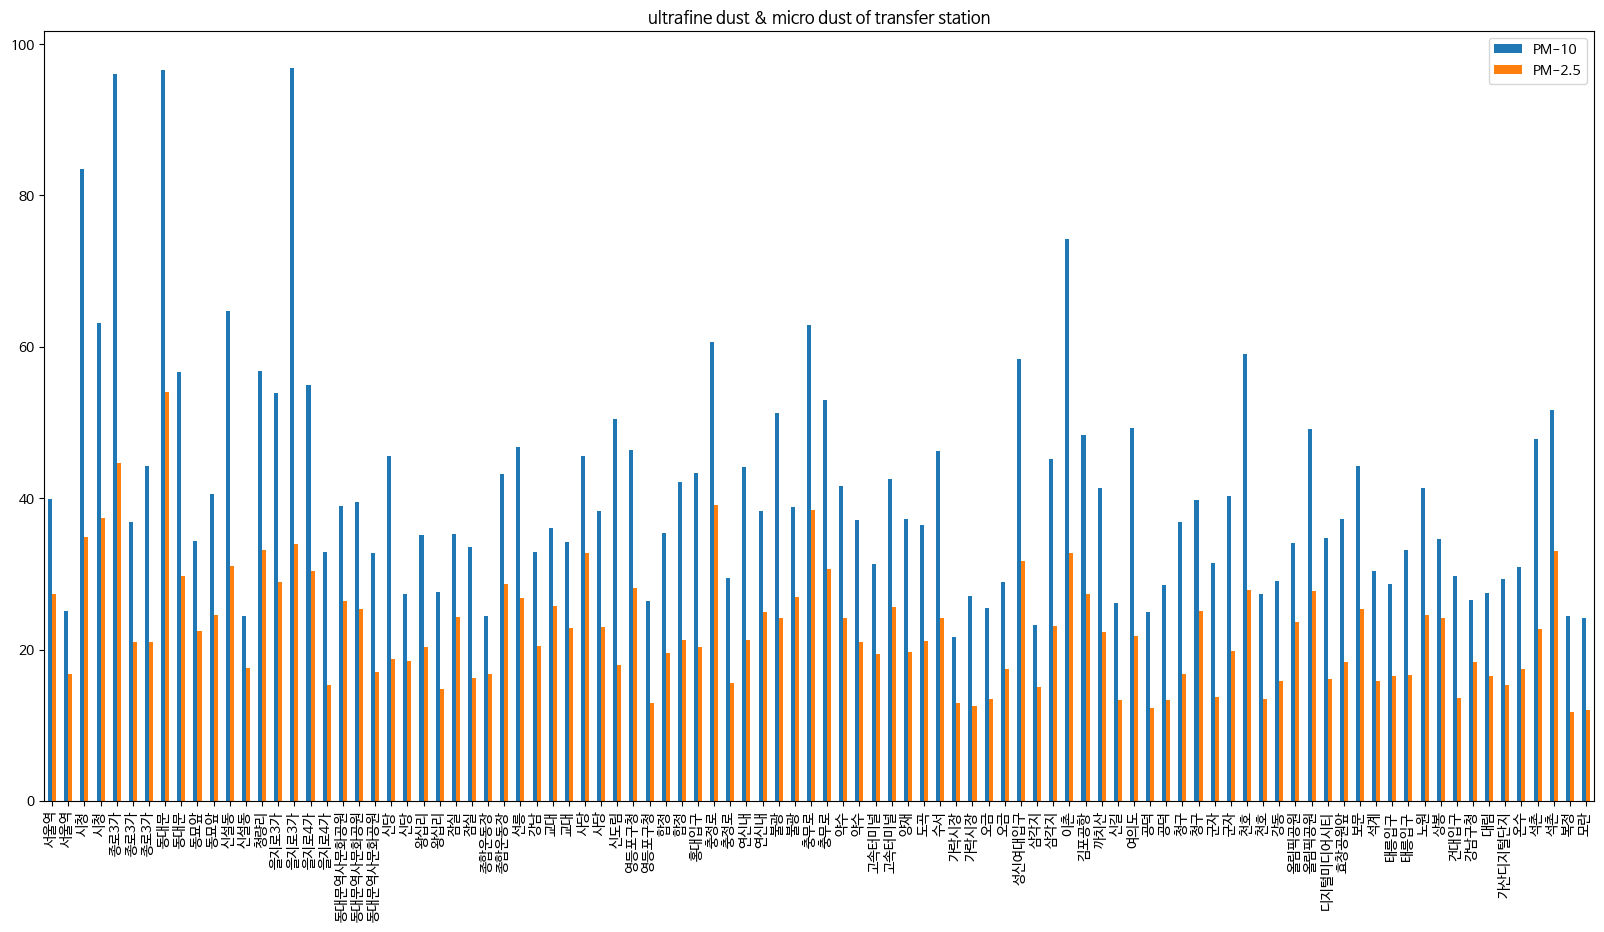

In [ ]:
#지하철 공기질 그래프 그리기
# 미세먼지 & 초미세먼지
PM.plot(kind = 'bar')      
plt.rc('font', family='NanumBarunGothic') # 한글 폰트 
plt.xticks(np.arange(0,96,1),('서울역','서울역','시청','시청','종로3가','종로3가','종로3가','동대문',
                              '동대문','동묘앞','동묘앞','신설동','신설동','청량리','을지로3가','을지로3가',
                              '을지로4가','을지로4가','동대문역사문화공원','동대문역사문화공원','동대문역사문화공원',
                              '신당','신당','왕십리','왕십리','잠실','잠실','종합운동장','종합운동장','선릉','강남','교대',
                              '교대','사당','사당','신도림','영등포구청','영등포구청','합정','합정','홍대입구','충정로',
                              '충정로','연신내','연신내','불광','불광','충무로','충무로','약수','약수','고속터미널',
                              '고속터미널','양재','도곡','수서','가락시장','가락시장','오금','오금','성신여대입구','삼각지',
                              '삼각지','이촌','김포공항','까치산','신길','여의도','공덕','공덕','청구','청구','군자',
                              '군자','천호','천호','강동','올림픽공원','올림픽공원','디지털미디어시티','효창공원앞','보문',
                              '석계','태릉입구','태릉입구','노원','상봉','건대입구','강남구청','대림','가산디지털단지','온수',
                              '석촌','석촌','복정','모란')) # x 눈금
plt.rcParams['figure.figsize'] = [20,10 ] #그래프 사이즈
plt.title('ultrafine dust & micro dust of transfer station') #그래프 제목
plt.show()

미세먼지와 초미세먼지에 대한 시각화 자료이다. 파란색은 미세먼지 주황색은 초미세먼지이다. 

***두개의 데이터 시각화***

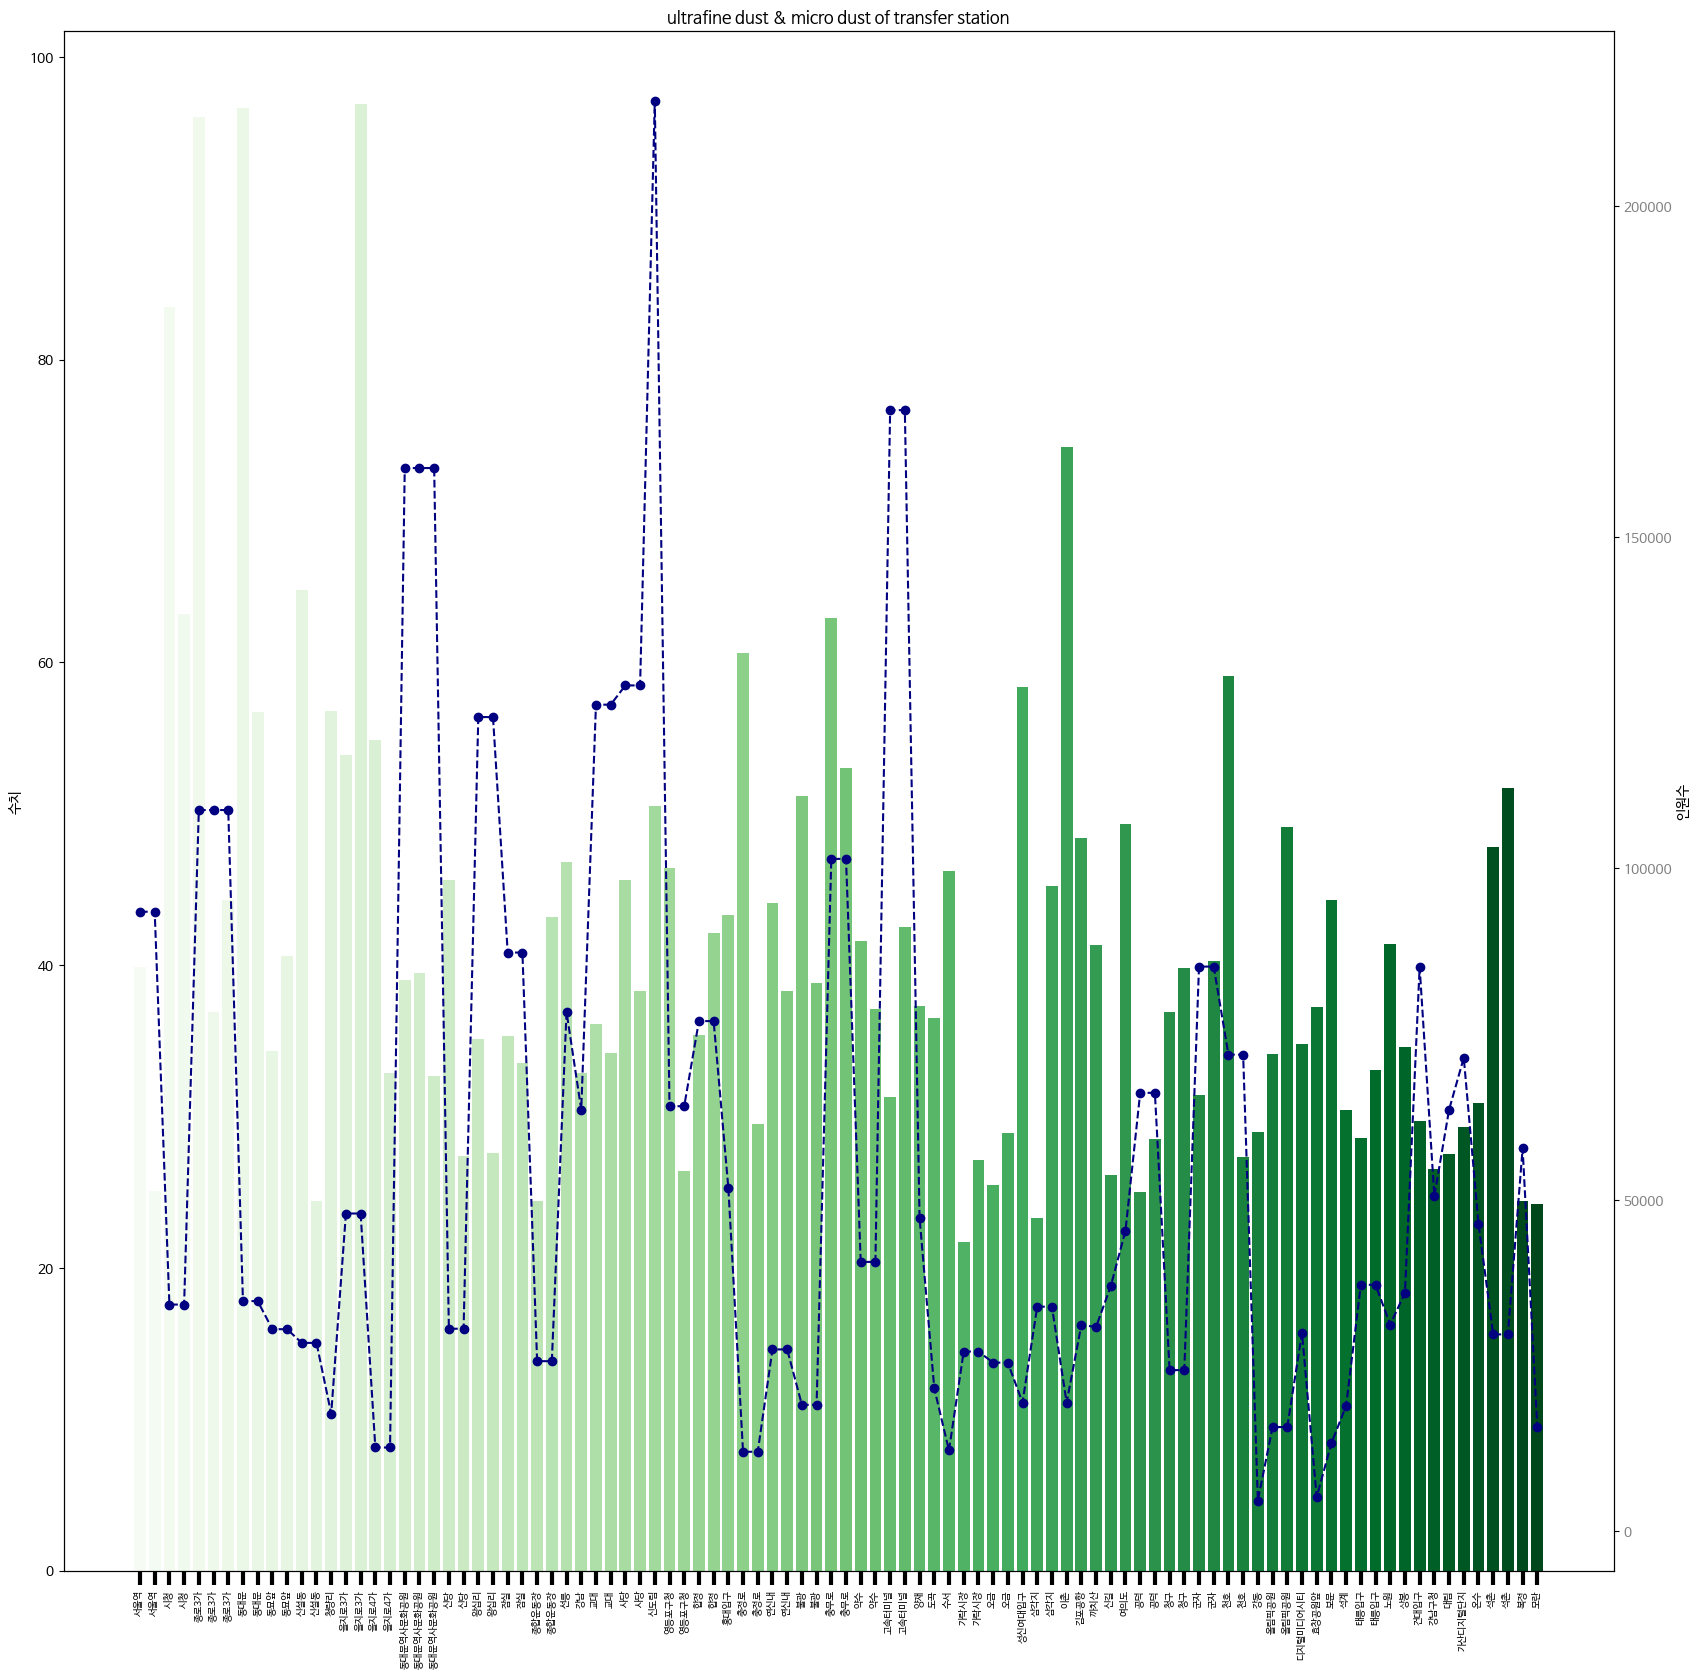

In [ ]:
#지하철 공기질 그래프 그리기
# 미세먼지 & 초미세먼지
import seaborn as sns
plt.rc('font', family='NanumBarunGothic') # 한글 폰트 
fig = plt.figure(figsize=(20,20) )
ax1 = fig.add_subplot()
plt.tick_params(axis ='x', labelsize = 7,
               length =10, width = 3,rotation=90) # x 눈금 텍스트 회전 

 
colors = sns.color_palette('Greens',len(PM))

xtick_label_position = list(range(len(PM))) # x축 눈금 라벨이 표시될 x좌표
ax1.set_xticks(xtick_label_position) # x축 눈금 
plt.xticks(np.arange(0,96,1),('서울역','서울역','시청','시청','종로3가','종로3가','종로3가','동대문',
                              '동대문','동묘앞','동묘앞','신설동','신설동','청량리','을지로3가','을지로3가',
                              '을지로4가','을지로4가','동대문역사문화공원','동대문역사문화공원','동대문역사문화공원',
                              '신당','신당','왕십리','왕십리','잠실','잠실','종합운동장','종합운동장','선릉','강남','교대',
                              '교대','사당','사당','신도림','영등포구청','영등포구청','합정','합정','홍대입구','충정로',
                              '충정로','연신내','연신내','불광','불광','충무로','충무로','약수','약수','고속터미널',
                              '고속터미널','양재','도곡','수서','가락시장','가락시장','오금','오금','성신여대입구','삼각지',
                              '삼각지','이촌','김포공항','까치산','신길','여의도','공덕','공덕','청구','청구','군자',
                              '군자','천호','천호','강동','올림픽공원','올림픽공원','디지털미디어시티','효창공원앞','보문',
                              '석계','태릉입구','태릉입구','노원','상봉','건대입구','강남구청','대림','가산디지털단지','온수',
                              '석촌','석촌','복정','모란')) # x 눈금
ax1.set_ylabel('수치',rotation=90)
plt.ticklabel_format(style='plain', axis='y',useOffset = False) # exponential 표기 변경
# plt.ylabel('수치',rotation=90)

ax1.bar(xtick_label_position, PM['PM-10'], color=colors)  # bar 표기 
 
color = 'navy'
ax2 = ax1.twinx() ## 새로운 axis 생성
ax2.plot(xtick_label_position, merge_data['평일(일평균)'], color=color, linestyle='--', marker='o') # line 그래프 
ax2.tick_params(axis='y', labelcolor='gray') # 눈금 label color
ax2.set_ylabel('인원수',rotation=90)
# plt.ylabel('인원수',rotation=90)



plt.rcParams['figure.figsize'] = [20,10 ] #그래프 사이즈
plt.title('ultrafine dust & micro dust of transfer station') #그래프 제목
plt.show()

환승역 이용 인원과 미세먼지를 각각의 라인그래프와 막대그래프로 시각화 한 자료이다.

> 들여쓴 블록

